# Deepgreen database connection and sessions.

In [2]:
import dg.conn
from dg.admin import activity
con = dg.conn.Conn(user="nimbix", port=5432)
print (con.ver)

5


In [30]:
# Long running queries, default nsec 60 secs.   
xt = dg.xtable.fromQuery(con, '''
select * from (
select 
dg_utils.transducer_column_text(1) as filename,
dg_utils.transducer_column_int4(2) as frame, 
dg_utils.transducer_column_text(3) as tag, 
dg_utils.transducer_column_float4(4) as score,
dg_utils.transducer_column_float4(5) as llx, 
dg_utils.transducer_column_float4(6) as lly, 
dg_utils.transducer_column_float4(7) as urx, 
dg_utils.transducer_column_float4(8) as ury, 
dg_utils.transducer_column_float4(9) as matchscore,
imgmatch(),
v.*
from video30 v where tag = 'person'
) tmpt 
order by matchscore desc limit 20
''') 

print(xt.show())

+--------------------------------------------+---------+--------+----------+-------+-------+-------+-------+--------------+------------+------------+---------+-------+---------+-------+-------+-------+-------+-------+
| filename                                   |   frame | tag    |    score |   llx |   lly |   urx |   ury |   matchscore |   imgmatch | filename   | frame   | tag   | score   | llx   | lly   | urx   | ury   | img   |
|--------------------------------------------+---------+--------+----------+-------+-------+-------+-------+--------------+------------+------------+---------+-------+---------+-------+-------+-------+-------+-------|
| /data/ftian/xdrive/videos/rename/bj-42.mp4 |     626 | person | 0.496303 |   686 |  1535 |   854 |  1220 |     0.533945 |          2 |            |         |       |         |       |       |       |       |       |
| /data/ftian/xdrive/videos/rename/bj-12.mp4 |     476 | person | 0.641503 |   727 |  1076 |   910 |   896 |     0.521675 |     

In [21]:
%matplotlib inline
import cv2, os, sys, base64
import matplotlib.pyplot as plt
import timeit
import numpy as np

plt.ion()


1080, 1920, 3


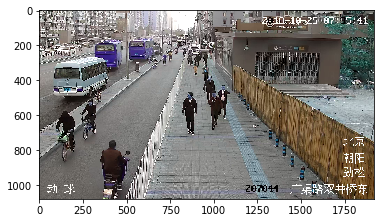

In [26]:
vc = cv2.VideoCapture("/home/ftian/BJVideo/rename/bj-60.mp4")
vc.set(1, 126)
ok, frame = vc.read()
h, w, c = frame.shape
print ("{0}, {1}, {2}".format(h, w, c))
show = plt.imshow(frame)
